In [21]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [22]:
# file path
file_path = "~/buckets/b1/exp/HT4220F/HT4220F.txt"

In [23]:
# load data
df = pl.read_csv(file_path, separator='\t', ignore_errors=True)
df.head()

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,envios,max_depth,lambda_l1,lambda_l2,bagging_fraction,bagging_freq,min_child_samples,subsample,colsample_bytree,min_gain_to_split,ganancia,iteracion
str,str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,i64,i64,f64,f64,f64,i64,i64,f64,f64,f64,f64,i64
"""20240923 225459""","""binary""","""custom""",true,true,false,-100,31,1,true,173249,0.286317,9494,0.567355,11059,15172,47,778.195112,278.990876,0.488402,692,408,0.429989,0.327838,62.127564,-3.507e7,1
"""20240923 225633""","""binary""","""custom""",true,true,false,-100,31,1,true,173249,0.161943,5177,0.287002,12086,19778,81,624.899196,522.740796,0.437714,378,582,0.356381,0.298376,43.009588,-4.5765e7,2
"""20240923 225739""","""binary""","""custom""",true,true,false,-100,31,1,true,173249,0.295693,6858,0.673175,3459,4977,38,730.768914,430.027987,0.081353,210,497,0.654938,0.653415,80.869461,-1.2285e7,3
"""20240923 225916""","""binary""","""custom""",true,true,false,-100,31,1,true,173249,0.220712,7366,0.218681,2029,24654,36,733.195474,730.224988,0.723675,366,611,0.547406,0.760216,26.936372,-5.703e7,4
"""20240923 230121""","""binary""","""custom""",true,true,false,-100,31,80,true,173249,0.098199,2302,0.628864,7057,20370,117,510.365523,503.907452,0.615154,298,522,0.813705,0.483241,72.485217,1.065e7,5


In [24]:
# convert 'fecha' to datetime
df = df.with_columns(pl.col('fecha').str.strptime(pl.Datetime, "%Y%m%d %H%M%S"))
df.head()

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,envios,max_depth,lambda_l1,lambda_l2,bagging_fraction,bagging_freq,min_child_samples,subsample,colsample_bytree,min_gain_to_split,ganancia,iteracion
datetime[μs],str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,i64,i64,f64,f64,f64,i64,i64,f64,f64,f64,f64,i64
2024-09-23 22:54:59,"""binary""","""custom""",true,true,false,-100,31,1,true,173249,0.286317,9494,0.567355,11059,15172,47,778.195112,278.990876,0.488402,692,408,0.429989,0.327838,62.127564,-3.507e7,1
2024-09-23 22:56:33,"""binary""","""custom""",true,true,false,-100,31,1,true,173249,0.161943,5177,0.287002,12086,19778,81,624.899196,522.740796,0.437714,378,582,0.356381,0.298376,43.009588,-4.5765e7,2
2024-09-23 22:57:39,"""binary""","""custom""",true,true,false,-100,31,1,true,173249,0.295693,6858,0.673175,3459,4977,38,730.768914,430.027987,0.081353,210,497,0.654938,0.653415,80.869461,-1.2285e7,3
2024-09-23 22:59:16,"""binary""","""custom""",true,true,false,-100,31,1,true,173249,0.220712,7366,0.218681,2029,24654,36,733.195474,730.224988,0.723675,366,611,0.547406,0.760216,26.936372,-5.703e7,4
2024-09-23 23:01:21,"""binary""","""custom""",true,true,false,-100,31,80,true,173249,0.098199,2302,0.628864,7057,20370,117,510.365523,503.907452,0.615154,298,522,0.813705,0.483241,72.485217,1.065e7,5


In [25]:
# calculate runtime
runtime = round((df['fecha'].max() - df['fecha'].min()).total_seconds()/60/60,2)
runtime

30.31

In [26]:
# sort by 'ganancia' in descending order
df_sorted = df.sort('ganancia', descending=True).filter(pl.col('ganancia').is_not_null())
df_sorted.head()

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,envios,max_depth,lambda_l1,lambda_l2,bagging_fraction,bagging_freq,min_child_samples,subsample,colsample_bytree,min_gain_to_split,ganancia,iteracion
datetime[μs],str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,i64,i64,f64,f64,f64,i64,i64,f64,f64,f64,f64,i64
2024-09-24 20:20:51,"""binary""","""custom""",true,true,false,-100,31,428,true,173249,0.222172,11005,0.496995,1056,11236,25,2.077652,940.371635,0.88656,347,325,0.873705,0.266124,0.06378,6.0255e7,383
2024-09-25 00:59:58,"""binary""","""custom""",true,true,false,-100,31,247,true,173249,0.252087,1705,0.729518,4194,11965,15,0.479358,198.970171,0.795023,350,247,0.871426,0.302424,0.00898,5.9025e7,416
2024-09-25 02:55:23,"""binary""","""custom""",true,true,false,-100,31,146,true,173249,0.237548,480,0.713909,6424,12038,30,0.945458,61.891191,0.840378,369,272,0.755444,0.479069,0.012282,5.8575e7,439
2024-09-24 17:56:16,"""binary""","""custom""",true,true,false,-100,31,193,true,173249,0.157053,12393,0.651072,11616,12149,93,7.69607,289.609294,0.989657,845,626,0.653785,0.337193,0.413675,5.8485e7,363
2024-09-24 10:01:17,"""binary""","""custom""",true,true,false,-100,31,192,true,173249,0.278733,12684,0.86192,11707,11444,103,0.691613,411.293011,0.965437,412,165,0.078603,0.312498,0.547253,5.844e7,270


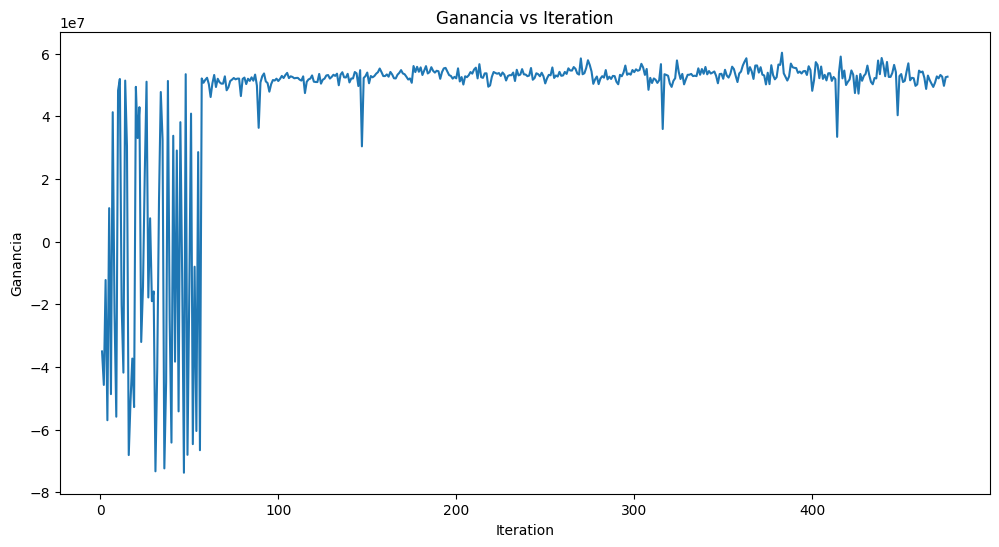

In [27]:
# plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['iteracion'], y=df['ganancia'])
plt.title('Ganancia vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Ganancia')
plt.show()

In [28]:
# Find the row with the best ganancia
best_params = df_sorted.head(1).tail(1)
best_params

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,envios,max_depth,lambda_l1,lambda_l2,bagging_fraction,bagging_freq,min_child_samples,subsample,colsample_bytree,min_gain_to_split,ganancia,iteracion
datetime[μs],str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,i64,i64,f64,f64,f64,i64,i64,f64,f64,f64,f64,i64
2024-09-24 20:20:51,"""binary""","""custom""",true,true,false,-100,31,428,true,173249,0.222172,11005,0.496995,1056,11236,25,2.077652,940.371635,0.88656,347,325,0.873705,0.266124,0.06378,6.0255e7,383


In [29]:
# List of all parameters we searched through
params = [
    'learning_rate', 'num_leaves', 'feature_fraction', 'min_data_in_leaf',
    'envios', 'max_depth', 'lambda_l1', 'lambda_l2', 'bagging_fraction',
    'bagging_freq', 'min_child_samples', 'subsample', 'colsample_bytree',
    'min_gain_to_split'
]

# Generate R code for the best parameters
r_code = "# Best hyperparameters\n"
for param in params:
    if param in best_params.columns:
        value = best_params[param][0]
        if isinstance(value, float):
            r_code += f"PARAM$finalmodel${param} <- {value:.6f}\n"
        elif isinstance(value, int):
            r_code += f"PARAM$finalmodel${param} <- {value}L\n"
        else:
            r_code += f"PARAM$finalmodel${param} <- {value}\n"
    else:
        r_code += f"# Warning: {param} not found in the results\n"

In [30]:
print(r_code)

# Best hyperparameters
PARAM$finalmodel$learning_rate <- 0.222172
PARAM$finalmodel$num_leaves <- 11005L
PARAM$finalmodel$feature_fraction <- 0.496995
PARAM$finalmodel$min_data_in_leaf <- 1056L
PARAM$finalmodel$envios <- 11236L
PARAM$finalmodel$max_depth <- 25L
PARAM$finalmodel$lambda_l1 <- 2.077652
PARAM$finalmodel$lambda_l2 <- 940.371635
PARAM$finalmodel$bagging_fraction <- 0.886560
PARAM$finalmodel$bagging_freq <- 347L
PARAM$finalmodel$min_child_samples <- 325L
PARAM$finalmodel$subsample <- 0.873705
PARAM$finalmodel$colsample_bytree <- 0.266124
PARAM$finalmodel$min_gain_to_split <- 0.063780

